# problem (a)

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the datasets

In [2]:
c_graphics = ['comp.graphics']
c_misc = ['comp.os.ms-windows.misc']
c_pc = ['comp.sys.ibm.pc.hardware']
c_mac = ['comp.sys.mac.hardware']
r_autos = ['rec.autos']
r_motorcycles = ['rec.motorcycles']
r_baseball = ['rec.sport.baseball']
r_hockey = ['rec.sport.hockey']
c_graphics_train = fetch_20newsgroups(subset = 'train',categories = c_graphics, shuffle = True, random_state = 42)
c_misc_train = fetch_20newsgroups(subset = 'train', categories = c_misc, shuffle = True, random_state = 42)
c_pc_train = fetch_20newsgroups(subset = 'train', categories = c_pc, shuffle = True, random_state = 42)
c_mac_train = fetch_20newsgroups(subset = 'train', categories = c_mac, shuffle = True, random_state = 42)
r_autos_train = fetch_20newsgroups(subset = 'train', categories = r_autos, shuffle = True, random_state =42)
r_motorcycles_train = fetch_20newsgroups(subset = 'train', categories = r_motorcycles, shuffle = True, random_state = 42)
r_baseball_train = fetch_20newsgroups(subset = 'train', categories = r_baseball, shuffle = True, random_state = 42)
r_hockey_train = fetch_20newsgroups(subset = 'train', categories = r_hockey, shuffle = True, random_state = 42)
#fetch data for part b
comall = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware']
recall = ['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
com_train = fetch_20newsgroups(subset = 'train', categories = comall, shuffle = True, random_state = 42,remove=('headers','footers','quotes'))
rec_train = fetch_20newsgroups(subset = 'train', categories = recall, shuffle = True, random_state = 42,remove=('headers','footers','quotes'))
c_train = com_train.data + rec_train.data
com_test = fetch_20newsgroups(subset = 'test', categories = comall, shuffle = True, random_state = 42,remove=('headers','footers','quotes'))
rec_test = fetch_20newsgroups(subset = 'test', categories = recall, shuffle = True, random_state = 42,remove=('headers','footers','quotes'))
c_test = com_test.data + rec_test.data
label_train = [1] * len(com_train.data) + [0] * len(rec_train.data)
label_test = [1] * len(com_test.data) + [0] * len(rec_test.data)

# plot the histogram

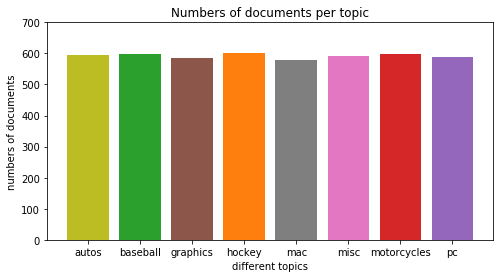

In [3]:
category = {'graphics':len(c_graphics_train.data),'misc':len(c_misc_train.data),'pc':len(c_pc_train.data),'mac':len(c_mac_train.data),'autos':len(r_autos_train.data),'motorcycles':len(r_motorcycles_train.data),'baseball':len(r_baseball_train.data),'hockey':len(r_hockey_train.data)}

names = list(category.keys())
values = list(category.values())

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(names,values, color = {'C1','C2','C3','C4','C5','C6','C7','C8'})
plt.title('Numbers of documents per topic')
plt.ylim(0,700)
plt.xlabel('different topics')
plt.ylabel('numbers of documents')
plt.show()

# problem (b)

In [4]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
stop_words = text.ENGLISH_STOP_WORDS
stem_words = SnowballStemmer("english")

#split the document into words and exclude punctuations and stem the word
# temp = c_train.data
temp = c_train
from string import punctuation
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
#symbols = '[! \( \) \* + , \" # $ % \& \' \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
#symbols = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'
for i in range(len(temp)):
    temp[i] = " ".join([stem_words.stem(t) for t in r.split(temp[i])])
    temp[i] = temp[i].replace('\n','').replace('\t','').replace('\r','')

#remove the stop words, and create the TFxIDF vector representations using min_df = 2 and min_df = 5
count_vect2 = CountVectorizer(stop_words = "english", min_df=2)
counts2 = count_vect2.fit_transform(temp)
tfidf2 = TfidfTransformer().fit_transform(counts2)
print ('Number of Terms with min_df = 2:'+str(tfidf2.shape))

count_vect5 = CountVectorizer(stop_words = "english", min_df=5)
counts5 = count_vect5.fit_transform(temp)
tfidf5 = TfidfTransformer().fit_transform(counts5)
print ('Number of Terms with min_df = 5:'+str(tfidf5.shape))

Number of Terms with min_df = 2:(4732, 16449)
Number of Terms with min_df = 5:(4732, 6910)


# problem (c)

In [6]:
def finding_10_most_significant_term(newsgroups,min_df_input):
    partc_train = fetch_20newsgroups(subset = 'train', categories = [newsgroups], shuffle = True, random_state = 42, remove=('headers','footers','quotes'))
    tp_icf = partc_train.data
    from string import punctuation
    r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
    for i in range(len(tp_icf)):
        tp_icf[i] = " ".join([stem_words.stem(t) for t in r.split(tp_icf[i])])
        tp_icf[i] = tp_icf[i].replace('\n','').replace('\t','').replace('\r','')
        
    countc_vect = CountVectorizer(tp_icf,stop_words = "english", min_df = min_df_input ,max_features = 10)
    countc = countc_vect.fit_transform(tp_icf)
    icf = TfidfTransformer().fit_transform(countc)
    #for (term, count) in zip(countc_vect.get_feature_names(),countc.toarray().sum(axis = 0)):
    #    print term + str(count)
    for term in countc_vect.get_feature_names():
        print (term) 
    print('\n')

#min_df = 2
print ("When min_df = 2")
print ("10 most significant terms in pc is :")   
finding_10_most_significant_term('comp.sys.ibm.pc.hardware',2)

print ("10 most significiant terms in mac is :")
finding_10_most_significant_term('comp.sys.mac.hardware',2)

print ("10 most significant terms in forsale is :")    
finding_10_most_significant_term('misc.forsale',2)

print ("10 most significiant terms in christian is :")
finding_10_most_significant_term('soc.religion.christian',2)

#min_df = 5
print ("\nWhen min_df = 5")
print ("10 most significant terms in pc is :")    
finding_10_most_significant_term('comp.sys.ibm.pc.hardware',5)

print ("10 most significiant terms in mac is :")
finding_10_most_significant_term('comp.sys.mac.hardware',5)

print ("10 most significant terms in forsale is :")    
finding_10_most_significant_term('misc.forsale',5)

print ("10 most significiant terms in christian is :")
finding_10_most_significant_term('soc.religion.christian',5)

When min_df = 2
10 most significant terms in pc is :
ani
card
control
disk
drive
ide
problem
scsi
use
work


10 most significiant terms in mac is :
ani
appl
card
drive
know
like
mac
problem
use
work


10 most significant terms in forsale is :
00
10
50
dos
includ
new
offer
price
sale
use


10 most significiant terms in christian is :
ani
believ
christian
church
god
jesus
know
peopl
say
think



When min_df = 5
10 most significant terms in pc is :
ani
card
control
disk
drive
ide
problem
scsi
use
work


10 most significiant terms in mac is :
ani
appl
card
drive
know
like
mac
problem
use
work


10 most significant terms in forsale is :
00
10
50
dos
includ
new
offer
price
sale
use


10 most significiant terms in christian is :
ani
believ
christian
church
god
jesus
know
peopl
say
think




# problem (d)

In [7]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

#min_df = 2
#using LSI
svd_2 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
LSI_2_only = svd_2.fit_transform(tfidf2)
print ("using LSI, document_term dimension is:" + str(LSI_2_only.shape))

#using NMF
nmf_2 = NMF(n_components=50, init='random', random_state=0)
nmf_train_2_only = nmf_2.fit_transform(tfidf2)
print ("using NMF, document_term dimension is:" + str(nmf_train_2_only.shape))

#min_df = 5
#using LSI
svd_5 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
LSI_5_only = svd_5.fit_transform(tfidf5)
print ("using LSI, document_term dimension is:" + str(LSI_5_only.shape))

#using NMF
nmf_5 = NMF(n_components=50, init='random', random_state=0)
nmf_train_5_only = nmf_5.fit_transform(tfidf5)
print ("using NMF, document_term dimension is:" + str(nmf_train_5_only.shape))

using LSI, document_term dimension is:(4732, 50)
using NMF, document_term dimension is:(4732, 50)
using LSI, document_term dimension is:(4732, 50)
using NMF, document_term dimension is:(4732, 50)


# problem (e)

HARD SVM: 
LSI2
Confusion Matrix:
[[1536   54]
 [ 121 1439]]
Accuracy: 
0.944444444444
Precision:
0.963831212324
Recall: 
0.922435897436


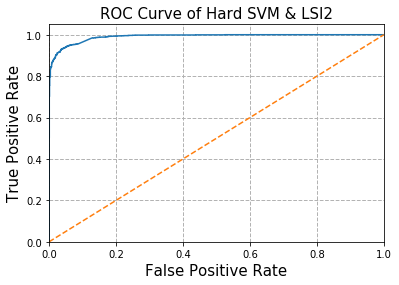

LSI5
Confusion Matrix:
[[1538   52]
 [ 118 1442]]
Accuracy: 
0.946031746032
Precision:
0.965194109772
Recall: 
0.924358974359


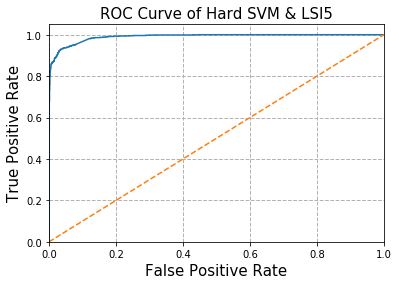

NMF2
Confusion Matrix:
[[1539   51]
 [ 124 1436]]
Accuracy: 
0.944444444444
Precision:
0.965702757229
Recall: 
0.920512820513


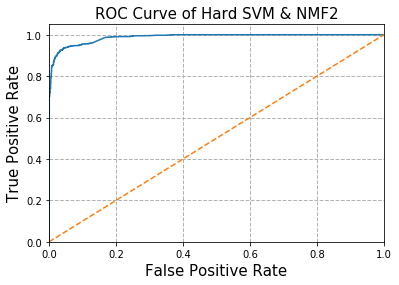

SOFT SVM: 
LSI2
Confusion Matrix:
[[1590    0]
 [1560    0]]
Accuracy: 
0.504761904762
Precision:
0.0
Recall: 
0.0


/Users/kalel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


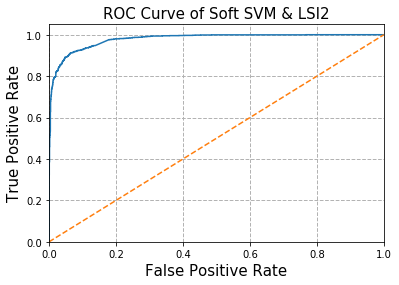

LSI5
Confusion Matrix:
[[1590    0]
 [1560    0]]
Accuracy: 
0.504761904762
Precision:
0.0
Recall: 
0.0


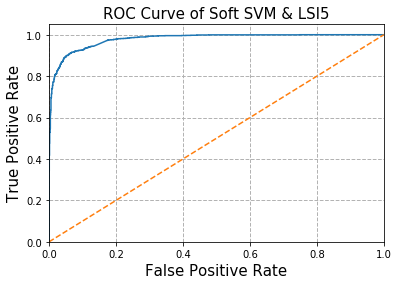

NMF2
Confusion Matrix:
[[1590    0]
 [1560    0]]
Accuracy: 
0.504761904762
Precision:
0.0
Recall: 
0.0


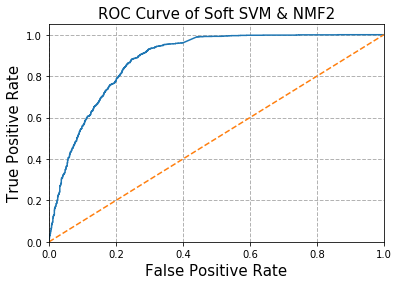

In [8]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve


# consider mindf = 2 & LSI
temp_df2 = c_train + c_test
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
for i in range(len(temp_df2)):
    temp_df2[i] = " ".join([stem_words.stem(t) for t in r.split(temp_df2[i])])
    temp_df2[i] = temp_df2[i].replace('\n','').replace('\t','').replace('\r','')
count_vect2 = CountVectorizer(stop_words = "english", min_df=2)
counts2 = count_vect2.fit_transform(temp_df2)
tfidf2_test = TfidfTransformer().fit_transform(counts2)
svd_2_test = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
LSI_2_all = svd_2_test.fit_transform(tfidf2_test)
LSI_2 = LSI_2_all[0:(len(c_train))]
LSI_2_test = LSI_2_all[(len(c_train)):]

# consider mindf = 5 & LSI
temp_df5 = c_train + c_test
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
for i in range(len(temp_df5)):
    temp_df5[i] = " ".join([stem_words.stem(t) for t in r.split(temp_df5[i])])
    temp_df5[i] = temp_df5[i].replace('\n','').replace('\t','').replace('\r','')
count_vect2 = CountVectorizer(stop_words = "english", min_df=5)
counts2 = count_vect2.fit_transform(temp_df5)
tfidf5_test = TfidfTransformer().fit_transform(counts2)
svd_2_test = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
LSI_5_all = svd_2_test.fit_transform(tfidf5_test)
LSI_5 = LSI_5_all[0:(len(c_train))]
LSI_5_test = LSI_5_all[(len(c_train)):]

# consider mindf = 2 & NMF
temp_nmf = c_train + c_test
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
for i in range(len(temp_nmf)):
    temp_nmf[i] = " ".join([stem_words.stem(t) for t in r.split(temp_nmf[i])])
    temp_nmf[i] = temp_nmf[i].replace('\n','').replace('\t','').replace('\r','')
count_vect2 = CountVectorizer(stop_words = "english", min_df=2)
counts2 = count_vect2.fit_transform(temp_nmf)
tfidf2_test = TfidfTransformer().fit_transform(counts2)
nmf_2 = NMF(n_components=50, init='random', random_state=42)
nmf_2_all = nmf_2.fit_transform(tfidf2_test)
nmf_train_2 = nmf_2_all[0:(len(c_train))]
nmf_2_test = nmf_2_all[(len(c_train)):]

print ('HARD SVM: ')
for (hardsvm_test, hardsvm_train, name) in ((LSI_2_test, LSI_2, 'LSI2'), (LSI_5_test, LSI_5, 'LSI5'), (nmf_2_test, nmf_train_2, 'NMF2')):
    classifier = svm.SVC(kernel='linear', C=1000)
    classifier.fit(hardsvm_train, label_train)
    label_predicted = classifier.predict(hardsvm_test)
    score = classifier.decision_function(hardsvm_test)
    
    print (name)
    print ('Confusion Matrix:')
    print (metrics.confusion_matrix(label_test, label_predicted) )
    print ('Accuracy: ')
    print (metrics.accuracy_score(label_test, label_predicted) )
    print ('Precision:')
    print (metrics.precision_score(label_test, label_predicted) )
    print ('Recall: ')
    print (metrics.recall_score(label_test, label_predicted))

    fpr, tpr, threshold = roc_curve(label_test, score)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.grid(color='0.7', linestyle='--', linewidth = 1)
    plt.plot([0,1], [0,1], '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate',fontsize = 15)
    plt.xlabel('False Positive Rate',fontsize = 15)
    plt.title('ROC Curve of Hard SVM & ' + name, fontsize = 15)
    plt.show()

print ('SOFT SVM: ')
for (softsvm_test, softsvm_train, name) in ((LSI_2_test, LSI_2, 'LSI2'), (LSI_5_test, LSI_5, 'LSI5'), (nmf_2_test, nmf_train_2, 'NMF2')):
    classifier = svm.SVC(kernel='linear', C=0.001)
    classifier.fit(softsvm_train, label_train)
    label_predicted = classifier.predict(softsvm_test)
    score = classifier.decision_function(softsvm_test)

    print (name)
    print ('Confusion Matrix:')
    print (metrics.confusion_matrix(label_test, label_predicted) )
    print ('Accuracy: ')
    print (metrics.accuracy_score(label_test, label_predicted) )
    print ('Precision:')
    print (metrics.precision_score(label_test, label_predicted) )
    print ('Recall: ')
    print (metrics.recall_score(label_test, label_predicted))

    fpr, tpr, threshold = roc_curve(label_test, score)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.grid(color='0.7', linestyle='--', linewidth = 1)
    plt.plot([0,1], [0,1], '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate',fontsize = 15)
    plt.xlabel('False Positive Rate',fontsize = 15)
    plt.title('ROC Curve of Soft SVM & ' + name, fontsize = 15)
    plt.show()


# problem(f)

[ 0.50486392  0.50613242  0.90786259  0.93132     0.93681393  0.94146398
  0.94378889]


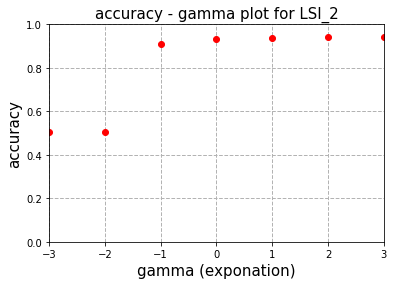

Best gamma for LSI_2 is: 1000
Name: LSI_2 & Gamma = 1000
Confusion Matrix:
[[ 2316.    73.]
 [  193.  2150.]]
Accuracy: 
0.943788887128
Precision:
0.967256827288
Recall: 
0.917756877176


[ 0.50486392  0.50888016  0.91293458  0.9327988   0.93702624  0.93956123
  0.94082928]


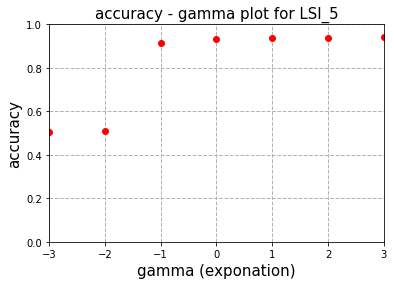

Best gamma for LSI_5 is: 1000
Name: LSI_5 & Gamma = 1000
Confusion Matrix:
[[ 2308.    81.]
 [  199.  2144.]]
Accuracy: 
0.94082927951
Precision:
0.963835515142
Recall: 
0.915133577222


[ 0.50486392  0.50486392  0.66615483  0.89729713  0.91990842  0.92878457
  0.93258761]


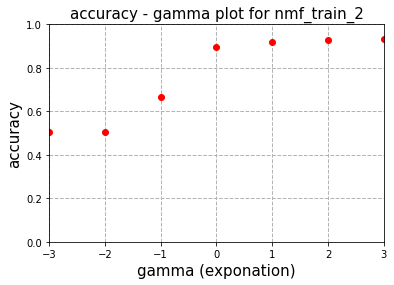

Best gamma for nmf_train_2 is: 1000
Name: nmf_train_2 & Gamma = 1000
Confusion Matrix:
[[ 2298.    91.]
 [  228.  2115.]]
Accuracy: 
0.932587608359
Precision:
0.958936668588
Recall: 
0.902768904322




In [54]:
from sklearn.cross_validation import KFold
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve


kfset = KFold(n_folds=5, n=len(label_train), shuffle=True, random_state=42)
for (data, name) in ((LSI_2_only, 'LSI_2'), (LSI_5_only, 'LSI_5'), (nmf_train_2_only, 'nmf_train_2')):
    j = 0
    result = np.zeros((5, 7))
    for train_index, test_index in kfset:
        temp = np.array(label_train)
        X_train, X_test = data[train_index], data[test_index]
        label_train_kfo, label_test_kfo = temp[train_index], temp[test_index]
        values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        pltx = [-3, -2, -1, 0, 1, 2, 3]
        i = 0
        for value in values:
            classifier = svm.SVC(kernel='linear', C=value)
            classifier.fit(X_train, label_train_kfo)
            label_predicted = classifier.predict(X_test)
            score = classifier.decision_function(X_test)
            result[j][i] = metrics.accuracy_score(label_test_kfo, label_predicted)
            i = i + 1
        j = j + 1
#     print(result)
    average = np.mean(result, axis=0)
    print(average)
    plt.figure()
    plt.plot(pltx, average, 'ro')
    plt.grid(color='0.7', linestyle='--', linewidth = 1)
    plt.xlim([-3.0, 3.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('accuracy',fontsize = 15)
    plt.xlabel('gamma (exponation)',fontsize = 15)
    plt.title('accuracy - gamma plot for ' + name, fontsize = 15)
    plt.show()

    gamma_index = np.argmax(average)
    gamma_value = 10**(gamma_index-3)
    print('Best gamma for ' + name + ' is: ' + str(gamma_value))
    (ac, pc, rs) = (0, 0, 0)
    cm = np.zeros((2, 2))
    for train_index, test_index in kfset:
        temp = np.array(label_train)
        X_train, X_test = data[train_index], data[test_index]
        label_train_kfo, label_test_kfo = temp[train_index], temp[test_index]
        classifier = svm.SVC(kernel='linear', C=gamma_value)
        classifier.fit(X_train, label_train_kfo)
        label_predicted = classifier.predict(X_test)
        score = classifier.decision_function(X_test)
        cm = cm + metrics.confusion_matrix(label_test_kfo, label_predicted)
        ac = ac + metrics.accuracy_score(label_test_kfo, label_predicted)
        pc = pc + metrics.precision_score(label_test_kfo, label_predicted)
        rs = rs + metrics.recall_score(label_test_kfo, label_predicted)

    print ('Name: ' + name + ' & ' + 'Gamma = ' + str(gamma_value))
    print ('Confusion Matrix:')
    print (cm)
    print ('Accuracy: ')
    print (ac/5)
    print ('Precision:')
    print (pc/5)
    print ('Recall: ')
    print (rs/5)
    print ('\n')
    print('============================================')

# problem (g)

In [10]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [11]:
#fetch the data for training set and testing set
nb_data = c_train + c_test

#setting the target group
nb_train = label_train
nb_test = label_test

#extract the feature
def nb_tfidf(data, min_df_input):
    from string import punctuation
    r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
    for i in range(len(data)):
        data[i] = " ".join([stem_words.stem(t) for t in r.split(data[i])])
        data[i] = data[i].replace('\n','').replace('\t','').replace('\r','')
    
    count_vect = CountVectorizer(stop_words = "english", min_df=min_df_input)
    counts = count_vect.fit_transform(data)
    tfidf = TfidfTransformer().fit_transform(counts)
    return tfidf

#classify using naive bayes
#Using LSI, min_df = 2
nb_svd_2 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_2 = nb_svd_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_LSI_2 = nb_LSI_2[0:(len(c_train))]
nb_test_LSI_2 = nb_LSI_2[(len(c_train)):]

classifier = GaussianNB()
classifier.fit(nb_train_LSI_2, nb_train)

predicted_2 = classifier.predict(nb_test_LSI_2)
predict_prob_2 = classifier.predict_proba(nb_test_LSI_2)[:,1]

#Using LSI, min_df = 5
nb_svd_5 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_5 = nb_svd_5.fit_transform(nb_tfidf(nb_data,5))

nb_train_LSI_5 = nb_LSI_5[0:(len(c_train))]
nb_test_LSI_5 = nb_LSI_5[(len(c_train)):]

classifier = GaussianNB()
classifier.fit(nb_train_LSI_5, nb_train)

predicted_5 = classifier.predict(nb_test_LSI_5)
predict_prob_5 = classifier.predict_proba(nb_test_LSI_5[:])[:,1]

#Using NMF, min_df = 2
nb_NMF_2 = NMF(n_components=50, init='random', random_state=42)
nb_NMF_2 = nb_NMF_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_NMF_2 = nb_NMF_2[0:(len(c_train))]
nb_test_NMF_2 = nb_NMF_2[(len(c_train)):]

classifier = GaussianNB()
classifier.fit(nb_train_NMF_2, nb_train)

predicted_NMF_2 = classifier.predict(nb_test_NMF_2)
predict_NMF_prob_2 = classifier.predict_proba(nb_test_NMF_2)[:,1]

Naive Bayes Classification
Using LSI, min_df = 2
Confusion Matrix:
[[1450  140]
 [ 425 1135]]
Accuracy: 
0.820634920635
Precision:
0.890196078431
Recall: 
0.727564102564


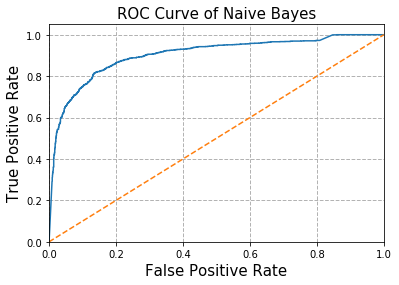


Using LSI, min_df = 5
Confusion Matrix:
[[1454  136]
 [ 405 1155]]
Accuracy: 
0.828253968254
Precision:
0.894655305964
Recall: 
0.740384615385


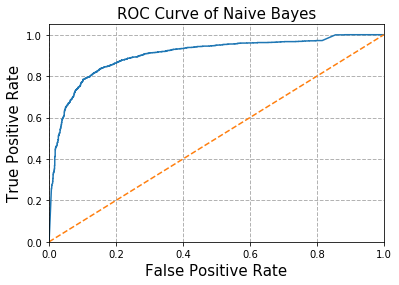


Using NMF, min_df = 2
Confusion Matrix:
[[1543   47]
 [ 213 1347]]
Accuracy: 
0.91746031746
Precision:
0.966284074605
Recall: 
0.863461538462


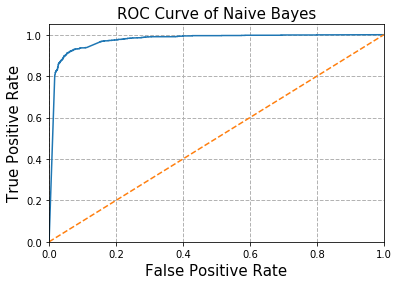

In [12]:
print ('Naive Bayes Classification')

#plot the curve when using LSI, min_df = 2
print ('Using LSI, min_df = 2')
print ('Confusion Matrix:')
print (metrics.confusion_matrix(nb_test, predicted_2) )

print ('Accuracy: ')
print (metrics.accuracy_score(nb_test, predicted_2) )

print ('Precision:')
print (metrics.precision_score(nb_test, predicted_2) )

print ('Recall: ')
print (metrics.recall_score(nb_test, predicted_2))

fpr, tpr, threshold = roc_curve(nb_test, predict_prob_2)
plt.figure()
plt.plot(fpr, tpr)
plt.grid(color='0.7', linestyle='--', linewidth = 1)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve of Naive Bayes', fontsize = 15)
plt.show()



#plot the curve when using LSI, min_df = 5
print ('\nUsing LSI, min_df = 5')
print ('Confusion Matrix:')
print (metrics.confusion_matrix(nb_test, predicted_5) )

print ('Accuracy: ')
print (metrics.accuracy_score(nb_test, predicted_5) )

print ('Precision:')
print (metrics.precision_score(nb_test, predicted_5) )

print ('Recall: ')
print (metrics.recall_score(nb_test, predicted_5))

fpr, tpr, threshold = roc_curve(nb_test, predict_prob_5)
plt.figure()
plt.plot(fpr, tpr)
plt.grid(color='0.7', linestyle='--', linewidth = 1)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve of Naive Bayes', fontsize = 15)
plt.show()



#plot the curve when using NMF, min_df = 2
print ('\nUsing NMF, min_df = 2')
print ('Confusion Matrix:')
print (metrics.confusion_matrix(nb_test, predicted_NMF_2) )

print ('Accuracy: ')
print (metrics.accuracy_score(nb_test, predicted_NMF_2) )

print ('Precision:')
print (metrics.precision_score(nb_test, predicted_NMF_2) )

print ('Recall: ')
print (metrics.recall_score(nb_test, predicted_NMF_2))

fpr, tpr, threshold = roc_curve(nb_test, predict_NMF_prob_2)
plt.figure()
plt.plot(fpr, tpr)
plt.grid(color='0.7', linestyle='--', linewidth = 1)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve of Naive Bayes', fontsize = 15)
plt.show()



# problem (h)

In [13]:
from sklearn.linear_model import LogisticRegression

#fetch the data for training set and testing set
nb_data = c_train + c_test

#setting the target group
nb_train = label_train
nb_test = label_test

#extract the feature
def nb_tfidf(data, min_df_input):
    from string import punctuation
    r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
    for i in range(len(data)):
        data[i] = " ".join([stem_words.stem(t) for t in r.split(data[i])])
        data[i] = data[i].replace('\n','').replace('\t','').replace('\r','')
    
    count_vect = CountVectorizer(stop_words = "english", min_df=min_df_input)
    counts = count_vect.fit_transform(data)
    tfidf = TfidfTransformer().fit_transform(counts)
    return tfidf

#classify using logistic regression
#Using LSI, min_df = 2
nb_svd_2 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_2 = nb_svd_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_LSI_2 = nb_LSI_2[0:(len(c_train))]
nb_test_LSI_2 = nb_LSI_2[(len(c_train)):]

classifier = LogisticRegression()
classifier.fit(nb_train_LSI_2, nb_train)

predicted_2 = classifier.predict(nb_test_LSI_2)
predict_prob_2 = classifier.predict_proba(nb_test_LSI_2)[:,1]

#Using LSI, min_df = 5
nb_svd_5 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_5 = nb_svd_5.fit_transform(nb_tfidf(nb_data,5))

nb_train_LSI_5 = nb_LSI_5[0:(len(c_train))]
nb_test_LSI_5 = nb_LSI_5[(len(c_train)):]

classifier = LogisticRegression()
classifier.fit(nb_train_LSI_5, nb_train)

predicted_5 = classifier.predict(nb_test_LSI_5)
predict_prob_5 = classifier.predict_proba(nb_test_LSI_5[:])[:,1]

#Using NMF, min_df = 2
nb_NMF_2 = NMF(n_components=50, init='random', random_state=42)
nb_NMF_2 = nb_NMF_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_NMF_2 = nb_NMF_2[0:(len(c_train))]
nb_test_NMF_2 = nb_NMF_2[(len(c_train)):]

classifier = LogisticRegression()
classifier.fit(nb_train_NMF_2, nb_train)

predicted_NMF_2 = classifier.predict(nb_test_NMF_2)
predict_NMF_prob_2 = classifier.predict_proba(nb_test_NMF_2)[:,1]

Logistic Regression Classification
Using LSI, min_df = 2
Confusion Matrix:
[[1549   41]
 [ 169 1391]]
Accuracy: 
0.933333333333
Precision:
0.971368715084
Recall: 
0.891666666667


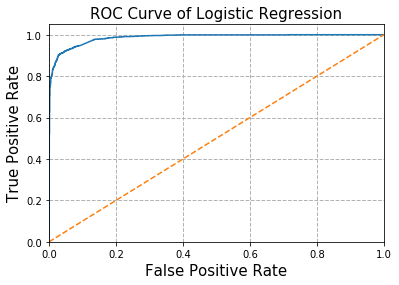


Using LSI, min_df = 5
Confusion Matrix:
[[1548   42]
 [ 158 1402]]
Accuracy: 
0.936507936508
Precision:
0.970914127424
Recall: 
0.898717948718


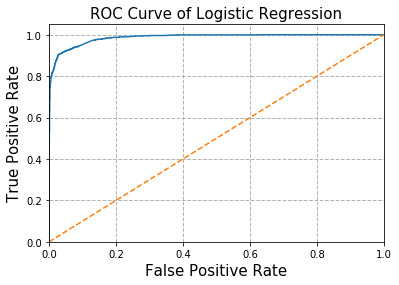


Using NMF, min_df = 2
Confusion Matrix:
[[1475  115]
 [ 339 1221]]
Accuracy: 
0.855873015873
Precision:
0.913922155689
Recall: 
0.782692307692


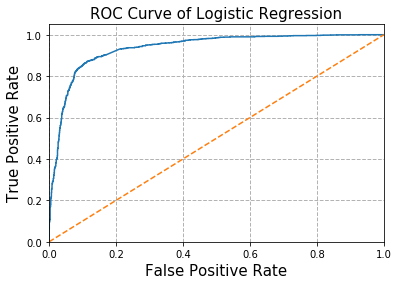

In [14]:
print ('Logistic Regression Classification')

#plot the curve when using LSI, min_df = 2
print ('Using LSI, min_df = 2')
print ('Confusion Matrix:')
print (metrics.confusion_matrix(nb_test, predicted_2) )

print ('Accuracy: ')
print (metrics.accuracy_score(nb_test, predicted_2) )

print ('Precision:')
print (metrics.precision_score(nb_test, predicted_2) )

print ('Recall: ')
print (metrics.recall_score(nb_test, predicted_2))

fpr, tpr, threshold = roc_curve(nb_test, predict_prob_2)
plt.figure()
plt.plot(fpr, tpr)
plt.grid(color='0.7', linestyle='--', linewidth = 1)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve of Logistic Regression', fontsize = 15)
plt.show()



#plot the curve when using LSI, min_df = 5
print ('\nUsing LSI, min_df = 5')
print ('Confusion Matrix:')
print (metrics.confusion_matrix(nb_test, predicted_5) )

print ('Accuracy: ')
print (metrics.accuracy_score(nb_test, predicted_5) )

print ('Precision:')
print (metrics.precision_score(nb_test, predicted_5) )

print ('Recall: ')
print (metrics.recall_score(nb_test, predicted_5))

fpr, tpr, threshold = roc_curve(nb_test, predict_prob_5)
plt.figure()
plt.plot(fpr, tpr)
plt.grid(color='0.7', linestyle='--', linewidth = 1)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve of Logistic Regression', fontsize = 15)
plt.show()



#plot the curve when using NMF, min_df = 2
print ('\nUsing NMF, min_df = 2')
print ('Confusion Matrix:')
print (metrics.confusion_matrix(nb_test, predicted_NMF_2) )

print ('Accuracy: ')
print (metrics.accuracy_score(nb_test, predicted_NMF_2) )

print ('Precision:')
print (metrics.precision_score(nb_test, predicted_NMF_2) )

print ('Recall: ')
print (metrics.recall_score(nb_test, predicted_NMF_2))

fpr, tpr, threshold = roc_curve(nb_test, predict_NMF_prob_2)
plt.figure()
plt.plot(fpr, tpr)
plt.grid(color='0.7', linestyle='--', linewidth = 1)
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve of Logistic Regression', fontsize = 15)
plt.show()



# Problem (i)

In [15]:
from sklearn.linear_model import LogisticRegression
#fetch the data for training set and testing set
nb_data = c_train + c_test

#setting the target group
nb_train = label_train
nb_test = label_test

#extract the feature
def nb_tfidf(data, min_df_input):
    from string import punctuation
    r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
    for i in range(len(data)):
        data[i] = " ".join([stem_words.stem(t) for t in r.split(data[i])])
        data[i] = data[i].replace('\n','').replace('\t','').replace('\r','')
    
    count_vect = CountVectorizer(stop_words = "english", min_df=min_df_input)
    counts = count_vect.fit_transform(data)
    tfidf = TfidfTransformer().fit_transform(counts)
    return tfidf

#classify using logistic regression
#Using LSI, min_df = 2, penalty = l1
nb_svd_2 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_2 = nb_svd_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_LSI_2 = nb_LSI_2[0:(len(c_train))]
nb_test_LSI_2 = nb_LSI_2[(len(c_train)):]

regularization = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_2 = list()
precision_2 = list()
recall_2 = list()
confusion_matrix_2 = list()
for i in regularization:
    classifier = LogisticRegression(penalty = 'l1', C = i)
    classifier.fit(nb_train_LSI_2, nb_train)
    predicted_2 = classifier.predict(nb_test_LSI_2)
    accuracy_2.append(metrics.accuracy_score(nb_test, predicted_2))
    precision_2.append(metrics.precision_score(nb_test, predicted_2))
    recall_2.append(metrics.recall_score(nb_test, predicted_2))
    confusion_matrix_2.append(metrics.confusion_matrix(nb_test, predicted_2))


#Using LSI, min_df = 5, penalty = l1
nb_svd_5 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_5 = nb_svd_5.fit_transform(nb_tfidf(nb_data,5))

nb_train_LSI_5 = nb_LSI_5[0:(len(c_train))]
nb_test_LSI_5 = nb_LSI_5[(len(c_train)):]

regularization = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_5 = list()
precision_5 = list()
recall_5 = list()
confusion_matrix_5 = list()
for i in regularization:
    classifier = LogisticRegression(penalty = 'l1', C = i)
    classifier.fit(nb_train_LSI_5, nb_train)
    predicted_5 = classifier.predict(nb_test_LSI_5)
    accuracy_5.append(metrics.accuracy_score(nb_test, predicted_5))
    precision_5.append(metrics.precision_score(nb_test, predicted_5))
    recall_5.append(metrics.recall_score(nb_test, predicted_5))
    confusion_matrix_5.append(metrics.confusion_matrix(nb_test, predicted_5))
    
    
#Using NMF, min_df = 2, penalty = l1
nb_NMF_2 = NMF(n_components=50, init='random', random_state=42)
nb_NMF_2 = nb_NMF_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_NMF_2 = nb_NMF_2[0:(len(c_train))]
nb_test_NMF_2 = nb_NMF_2[(len(c_train)):]

regularization = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_NMF = list()
precision_NMF = list()
recall_NMF = list()
confusion_matrix_NMF = list()
for i in regularization:
    classifier = LogisticRegression(penalty = 'l1', C = i)
    classifier.fit(nb_train_NMF_2, nb_train)
    predicted_NMF_2 = classifier.predict(nb_test_NMF_2)
    accuracy_NMF.append(metrics.accuracy_score(nb_test, predicted_NMF_2))
    precision_NMF.append(metrics.precision_score(nb_test, predicted_NMF_2))
    recall_NMF.append(metrics.recall_score(nb_test, predicted_NMF_2))
    confusion_matrix_NMF.append(metrics.confusion_matrix(nb_test, predicted_NMF_2))
    



/Users/kalel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
print ('penalty = l1, Using LSI, min_df = 2')
for i in range(len(accuracy_2)):
    print ("===================================")
    print ("regularization is: " + str(regularization[i]))
    print ("accuracy is: " + str(accuracy_2[i]))
    print ("precision is:" + str(precision_2[i]))
    print ("recall is:" + str(recall_2[i]))
    print ("confusion matrix is:")
    print (confusion_matrix_2[i])
    print ("===================================")

penalty = l1, Using LSI, min_df = 2
regularization is: 0.01
accuracy is: 0.88380952381
precision is:0.932608695652
recall is:0.825
confusion matrix is:
[[1497   93]
 [ 273 1287]]
regularization is: 0.1
accuracy is: 0.905079365079
precision is:0.933929800413
recall is:0.869871794872
confusion matrix is:
[[1494   96]
 [ 203 1357]]
regularization is: 1
accuracy is: 0.93619047619
precision is:0.960677966102
recall is:0.908333333333
confusion matrix is:
[[1532   58]
 [ 143 1417]]
regularization is: 10
accuracy is: 0.945396825397
precision is:0.962666666667
recall is:0.925641025641
confusion matrix is:
[[1534   56]
 [ 116 1444]]
regularization is: 100
accuracy is: 0.945714285714
precision is:0.964548494983
recall is:0.924358974359
confusion matrix is:
[[1537   53]
 [ 118 1442]]
regularization is: 1000
accuracy is: 0.945714285714
precision is:0.964548494983
recall is:0.924358974359
confusion matrix is:
[[1537   53]
 [ 118 1442]]
regularization is: 10000
accuracy is: 0.945714285714
precision i

In [17]:
print ('penalty = l1, Using LSI, min_df = 5')
for i in range(len(accuracy_5)):
    print ("===================================")
    print ("regularization is: " + str(regularization[i]))
    print ("accuracy is: " + str(accuracy_5[i]))
    print ("precision is:" + str(precision_5[i]))
    print ("recall is:" + str(recall_5[i]))
    print ("confusion matrix is:")
    print (confusion_matrix_5[i])
    print ("===================================")

penalty = l1, Using LSI, min_df = 5
regularization is: 0.01
accuracy is: 0.88253968254
precision is:0.929913294798
recall is:0.825
confusion matrix is:
[[1493   97]
 [ 273 1287]]
regularization is: 0.1
accuracy is: 0.907619047619
precision is:0.937888198758
recall is:0.871153846154
confusion matrix is:
[[1500   90]
 [ 201 1359]]
regularization is: 1
accuracy is: 0.938412698413
precision is:0.965893587995
recall is:0.907692307692
confusion matrix is:
[[1540   50]
 [ 144 1416]]
regularization is: 10
accuracy is: 0.945079365079
precision is:0.9651240778
recall is:0.922435897436
confusion matrix is:
[[1538   52]
 [ 121 1439]]
regularization is: 100
accuracy is: 0.945714285714
precision is:0.962691538974
recall is:0.926282051282
confusion matrix is:
[[1534   56]
 [ 115 1445]]
regularization is: 1000
accuracy is: 0.946031746032
precision is:0.962716378162
recall is:0.926923076923
confusion matrix is:
[[1534   56]
 [ 114 1446]]
regularization is: 10000
accuracy is: 0.946031746032
precision is

In [18]:
print ('penalty = l1, Using NMF, min_df = 2')
for i in range(len(accuracy_NMF)):
    print ("===================================")
    print ("regularization is: " + str(regularization[i])) 
    print ("accuracy is: " + str(accuracy_NMF[i]))
    print ("precision is:" + str(precision_NMF[i]))
    print ("recall is:" + str(recall_NMF[i]))
    print ("confusion matrix is:")
    print (confusion_matrix_NMF[i])
    print ("===================================")

penalty = l1, Using NMF, min_df = 2
regularization is: 0.01
accuracy is: 0.504761904762
precision is:0.0
recall is:0.0
confusion matrix is:
[[1590    0]
 [1560    0]]
regularization is: 0.1
accuracy is: 0.646984126984
precision is:0.769230769231
recall is:0.410256410256
confusion matrix is:
[[1398  192]
 [ 920  640]]
regularization is: 1
accuracy is: 0.918095238095
precision is:0.945280437756
recall is:0.885897435897
confusion matrix is:
[[1510   80]
 [ 178 1382]]
regularization is: 10
accuracy is: 0.944126984127
precision is:0.961949265688
recall is:0.923717948718
confusion matrix is:
[[1533   57]
 [ 119 1441]]
regularization is: 100
accuracy is: 0.946666666667
precision is:0.962765957447
recall is:0.928205128205
confusion matrix is:
[[1534   56]
 [ 112 1448]]
regularization is: 1000
accuracy is: 0.946984126984
precision is:0.961563949636
recall is:0.930128205128
confusion matrix is:
[[1532   58]
 [ 109 1451]]
regularization is: 10000
accuracy is: 0.946349206349
precision is:0.9609012

In [19]:
#fetch the data for training set and testing set
nb_data = c_train + c_test

#setting the target group
nb_train = label_train
nb_test = label_test

#extract the feature
def nb_tfidf(data, min_df_input):
    from string import punctuation
    r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
    for i in range(len(data)):
        data[i] = " ".join([stem_words.stem(t) for t in r.split(data[i])])
        data[i] = data[i].replace('\n','').replace('\t','').replace('\r','')
    
    count_vect = CountVectorizer(stop_words = "english", min_df=min_df_input)
    counts = count_vect.fit_transform(data)
    tfidf = TfidfTransformer().fit_transform(counts)
    return tfidf

#classify using logistic regression
#Using LSI, min_df = 2, penalty = l2
nb_svd_2 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_2 = nb_svd_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_LSI_2 = nb_LSI_2[0:(len(c_train))]
nb_test_LSI_2 = nb_LSI_2[(len(c_train)):]

regularization = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_2 = list()
precision_2 = list()
recall_2 = list()
confusion_matrix_2 = list()
for i in regularization:
    classifier = LogisticRegression(penalty = 'l2', C = i)
    classifier.fit(nb_train_LSI_2, nb_train)
    predicted_2 = classifier.predict(nb_test_LSI_2)
    accuracy_2.append(metrics.accuracy_score(nb_test, predicted_2))
    precision_2.append(metrics.precision_score(nb_test, predicted_2))
    recall_2.append(metrics.recall_score(nb_test, predicted_2))
    confusion_matrix_2.append(metrics.confusion_matrix(nb_test, predicted_2))


#Using LSI, min_df = 5, penalty = l2
nb_svd_5 = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
nb_LSI_5 = nb_svd_5.fit_transform(nb_tfidf(nb_data,5))

nb_train_LSI_5 = nb_LSI_5[0:(len(c_train))]
nb_test_LSI_5 = nb_LSI_5[(len(c_train)):]

regularization = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_5 = list()
precision_5 = list()
recall_5 = list()
confusion_matrix_5 = list()
for i in regularization:
    classifier = LogisticRegression(penalty = 'l2', C = i)
    classifier.fit(nb_train_LSI_5, nb_train)
    predicted_5 = classifier.predict(nb_test_LSI_5)
    accuracy_5.append(metrics.accuracy_score(nb_test, predicted_5))
    precision_5.append(metrics.precision_score(nb_test, predicted_5))
    recall_5.append(metrics.recall_score(nb_test, predicted_5))
    confusion_matrix_5.append(metrics.confusion_matrix(nb_test, predicted_5))
    
    
#Using NMF, min_df = 2, penalty = l2
nb_NMF_2 = NMF(n_components=50, init='random', random_state=42)
nb_NMF_2 = nb_NMF_2.fit_transform(nb_tfidf(nb_data,2))

nb_train_NMF_2 = nb_NMF_2[0:(len(c_train))]
nb_test_NMF_2 = nb_NMF_2[(len(c_train)):]

regularization = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_NMF = list()
precision_NMF = list()
recall_NMF = list()
confusion_matrix_NMF = list()
for i in regularization:
    classifier = LogisticRegression(penalty = 'l2', C = i)
    classifier.fit(nb_train_NMF_2, nb_train)
    predicted_NMF_2 = classifier.predict(nb_test_NMF_2)
    accuracy_NMF.append(metrics.accuracy_score(nb_test, predicted_NMF_2))
    precision_NMF.append(metrics.precision_score(nb_test, predicted_NMF_2))
    recall_NMF.append(metrics.recall_score(nb_test, predicted_NMF_2))
    confusion_matrix_NMF.append(metrics.confusion_matrix(nb_test, predicted_NMF_2))
    

In [20]:
print ('penalty = l2, Using LSI, min_df = 2')
for i in range(len(accuracy_2)):
    print ("===================================")
    print ("regularization is: " + str(regularization[i]))
    print ("accuracy is: " + str(accuracy_2[i]))
    print ("precision is:" + str(precision_2[i]))
    print ("recall is:" + str(recall_2[i]))
    print ("confusion matrix is:")
    print (confusion_matrix_2[i])
    print ("===================================")

penalty = l2, Using LSI, min_df = 2
regularization is: 0.01
accuracy is: 0.889841269841
precision is:0.982498011138
recall is:0.791666666667
confusion matrix is:
[[1568   22]
 [ 325 1235]]
regularization is: 0.1
accuracy is: 0.912380952381
precision is:0.968613138686
recall is:0.850641025641
confusion matrix is:
[[1547   43]
 [ 233 1327]]
regularization is: 1
accuracy is: 0.933333333333
precision is:0.971368715084
recall is:0.891666666667
confusion matrix is:
[[1549   41]
 [ 169 1391]]
regularization is: 10
accuracy is: 0.944126984127
precision is:0.97074829932
recall is:0.914743589744
confusion matrix is:
[[1547   43]
 [ 133 1427]]
regularization is: 100
accuracy is: 0.946666666667
precision is:0.965863453815
recall is:0.925
confusion matrix is:
[[1539   51]
 [ 117 1443]]
regularization is: 1000
accuracy is: 0.945079365079
precision is:0.963879598662
recall is:0.923717948718
confusion matrix is:
[[1536   54]
 [ 119 1441]]
regularization is: 10000
accuracy is: 0.945714285714
precision 

In [21]:
print ('penalty = l2, Using LSI, min_df = 5')
for i in range(len(accuracy_5)):
    print ("===================================")
    print ("regularization is: " + str(regularization[i]))
    print ("accuracy is: " + str(accuracy_5[i]))
    print ("precision is:" + str(precision_5[i]))
    print ("recall is:" + str(recall_5[i]))
    print ("confusion matrix is:")
    print (confusion_matrix_5[i])
    print ("===================================")

penalty = l2, Using LSI, min_df = 5
regularization is: 0.01
accuracy is: 0.893015873016
precision is:0.977361436378
recall is:0.802564102564
confusion matrix is:
[[1561   29]
 [ 308 1252]]
regularization is: 0.1
accuracy is: 0.917142857143
precision is:0.967602591793
recall is:0.861538461538
confusion matrix is:
[[1545   45]
 [ 216 1344]]
regularization is: 1
accuracy is: 0.936507936508
precision is:0.970914127424
recall is:0.898717948718
confusion matrix is:
[[1548   42]
 [ 158 1402]]
regularization is: 10
accuracy is: 0.940634920635
precision is:0.967324710688
recall is:0.910897435897
confusion matrix is:
[[1542   48]
 [ 139 1421]]
regularization is: 100
accuracy is: 0.945396825397
precision is:0.965771812081
recall is:0.922435897436
confusion matrix is:
[[1539   51]
 [ 121 1439]]
regularization is: 1000
accuracy is: 0.946031746032
precision is:0.963333333333
recall is:0.926282051282
confusion matrix is:
[[1535   55]
 [ 115 1445]]
regularization is: 10000
accuracy is: 0.946031746032


In [22]:
print ('penalty = l2, Using NMF, min_df = 2')
for i in range(len(accuracy_NMF)):
    print ("===================================")
    print ("regularization is: " + str(regularization[i])) 
    print ("accuracy is: " + str(accuracy_NMF[i]))
    print ("precision is:" + str(precision_NMF[i]))
    print ("recall is:" + str(recall_NMF[i]))
    print ("confusion matrix is:")
    print (confusion_matrix_NMF[i])
    print ("===================================")

penalty = l2, Using NMF, min_df = 2
regularization is: 0.01
accuracy is: 0.613333333333
precision is:0.895833333333
recall is:0.248076923077
confusion matrix is:
[[1545   45]
 [1173  387]]
regularization is: 0.1
accuracy is: 0.762857142857
precision is:0.892753623188
recall is:0.592307692308
confusion matrix is:
[[1479  111]
 [ 636  924]]
regularization is: 1
accuracy is: 0.855873015873
precision is:0.913922155689
recall is:0.782692307692
confusion matrix is:
[[1475  115]
 [ 339 1221]]
regularization is: 10
accuracy is: 0.912063492063
precision is:0.947662247034
recall is:0.870512820513
confusion matrix is:
[[1515   75]
 [ 202 1358]]
regularization is: 100
accuracy is: 0.933650793651
precision is:0.960463531016
recall is:0.903205128205
confusion matrix is:
[[1532   58]
 [ 151 1409]]
regularization is: 1000
accuracy is: 0.944444444444
precision is:0.963831212324
recall is:0.922435897436
confusion matrix is:
[[1536   54]
 [ 121 1439]]
regularization is: 10000
accuracy is: 0.946349206349


# Problem (j)

In [23]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB

mulall = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

mul_train = fetch_20newsgroups(subset = 'train', categories = mulall, shuffle = True, random_state = 42,remove=('headers','footers','quotes'))
mul_test = fetch_20newsgroups(subset = 'test', categories = mulall, shuffle = True, random_state = 42,remove=('headers','footers','quotes'))
complete = mul_train.data + mul_test.data

In [24]:
# LSI2
temp = complete
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
for i in range(len(temp)):
    temp[i] = " ".join([stem_words.stem(t) for t in r.split(temp[i])])
    temp[i] = temp[i].replace('\n','').replace('\t','').replace('\r','')
count_vect2 = CountVectorizer(stop_words = "english", min_df=2)
counts2 = count_vect2.fit_transform(temp)
tfidf2_complete = TfidfTransformer().fit_transform(counts2)
svd_2_complete = TruncatedSVD(n_components = 50, n_iter = 10, random_state = 42)
LSI_2_complete = svd_2_complete.fit_transform(tfidf2_complete)
LSI_train = LSI_2_complete[0:len(mul_train.data)]
LSI_test = LSI_2_complete[len(mul_train.data):]

# NMF2
temp = complete
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
for i in range(len(temp)):
    temp[i] = " ".join([stem_words.stem(t) for t in r.split(temp[i])])
    temp[i] = temp[i].replace('\n','').replace('\t','').replace('\r','')
count_vect2 = CountVectorizer(stop_words = "english", min_df=2)
counts2 = count_vect2.fit_transform(temp)
tfidf2_complete = TfidfTransformer().fit_transform(counts2)
nmf_2 = NMF(n_components=50, init='random', random_state=42)
nmf_2_complete = nmf_2.fit_transform(tfidf2_complete)
nmf_train = nmf_2_complete[0:len(mul_train.data)]
nmf_test = nmf_2_complete[len(mul_train.data):]

for (classifier, name) in ((OneVsOneClassifier(GaussianNB()), 'NB'), (OneVsOneClassifier(svm.LinearSVC()), 'SVM1V1'), (OneVsRestClassifier(svm.LinearSVC()), 'SVM1VR')):
    if (name == 'NB'):
        classifier.fit(nmf_train, mul_train.target)
        label_predicted = classifier.predict(nmf_test)
        score = classifier.decision_function(nmf_test)

        print ('Name: ' + name)
        print ('Confusion Matrix:')
        print (metrics.confusion_matrix(mul_test.target, label_predicted) )
        print ('Accuracy: ')
        print (metrics.accuracy_score(mul_test.target, label_predicted) )
        print ('Precision:')
        print (metrics.precision_score(mul_test.target, label_predicted, average='weighted') )
        print ('Recall: ')
        print (metrics.recall_score(mul_test.target, label_predicted, average='weighted'))
        print ('\n')
    else:
#         LSI
        classifier.fit(LSI_train, mul_train.target)
        label_predicted = classifier.predict(LSI_test)
        score = classifier.decision_function(LSI_test)

        print ('Name: ' + name + ' & ' + 'LSI')
        print ('Confusion Matrix:')
        print (metrics.confusion_matrix(mul_test.target, label_predicted) )
        print ('Accuracy: ')
        print (metrics.accuracy_score(mul_test.target, label_predicted) )
        print ('Precision:')
        print (metrics.precision_score(mul_test.target, label_predicted, average='weighted') )
        print ('Recall: ')
        print (metrics.recall_score(mul_test.target, label_predicted, average='weighted'))
        print ('\n')
        
#         NMF
        classifier.fit(nmf_train, mul_train.target)
        label_predicted = classifier.predict(nmf_test)
        score = classifier.decision_function(nmf_test)

        print ('Name: ' + name + ' & ' + 'NMF')
        print ('Confusion Matrix:')
        print (metrics.confusion_matrix(mul_test.target, label_predicted) )
        print ('Accuracy: ')
        print (metrics.accuracy_score(mul_test.target, label_predicted) )
        print ('Precision:')
        print (metrics.precision_score(mul_test.target, label_predicted, average='weighted') )
        print ('Recall: ')
        print (metrics.recall_score(mul_test.target, label_predicted, average='weighted'))
        print ('\n')

Name: NB
Confusion Matrix:
[[217  90  65  20]
 [ 45 261  44  35]
 [ 39  37 263  51]
 [  4   2   3 389]]
Accuracy: 
0.722044728435
Precision:
0.717472155899
Recall: 
0.722044728435


Name: SVM1V1 & LSI
Confusion Matrix:
[[308  56  26   2]
 [ 50 311  20   4]
 [ 20  37 329   4]
 [  3  15  14 366]]
Accuracy: 
0.839616613419
Precision:
0.843397293018
Recall: 
0.839616613419


Name: SVM1V1 & NMF
Confusion Matrix:
[[282  72  35   3]
 [ 75 263  39   8]
 [ 44  24 315   7]
 [ 10   9  31 348]]
Accuracy: 
0.771884984026
Precision:
0.776382868805
Recall: 
0.771884984026


Name: SVM1VR & LSI
Confusion Matrix:
[[304  48  35   5]
 [ 48 291  40   6]
 [ 20  27 338   5]
 [  3   1  22 372]]
Accuracy: 
0.833865814696
Precision:
0.835575670621
Recall: 
0.833865814696


Name: SVM1VR & NMF
Confusion Matrix:
[[281  61  43   7]
 [ 69 256  47  13]
 [ 33  18 325  14]
 [  3   1  23 371]]
Accuracy: 
0.78785942492
Precision:
0.787650111786
Recall: 
0.78785942492


